In [12]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import time



In [3]:
import os
import sys

In [4]:
notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
data_dir = os.path.join(project_dir, 'data')

In [7]:
clean_field_df = pd.read_csv(os.path.join(data_dir, 'clean_field_data.csv'))
clean_field_df.set_index('Field_ID', inplace=True)
clean_field_df.head(3)

,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield,Weather_station
Field_ID,,,,,,,,,,,,,,,,,,
40734,786.0558,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,0.085267,1.3,0.751354,cassava,0.577964,4
30629,674.3341,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,0.399684,2.2,1.069865,cassava,0.486302,0
39924,826.5339,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,0.358029,3.4,2.208801,tea,0.649647,0


In [8]:
clean_field_df.shape

(5654, 18)

## Choosing relevant features 
The reasons behind choosing the following features is found in 'Simple_lm_model' notebook

In [9]:
# Define Highly Correlated Variables
highly_correlated_variables = ['Pollution_level', 'Annual_yield', 'pH', 
                               'Min_temperature_C', 'Elevation', 'Weather_station',
                               'Max_temperature_C', 'Longitude']

# Extract the highly correlated variables and the target variable
X = clean_field_df[highly_correlated_variables]
y = clean_field_df['Standard_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Train and Evaluate Linear Regression
LM3 = LinearRegression()
start_time = time.time()
LM3.fit(X_train_scaled, y_train)
lm3_time = time.time() - start_time

# Print the coefficients and intercept
print("Coefficients:")
for variable, coefficient in zip(highly_correlated_variables, LM3.coef_):
    print(f"{variable}: {coefficient}")
print(f"Intercept: {LM3.intercept_}")

# Evaluate the model
y_pred_lm3 = LM3.predict(X_test_scaled)
lm3_rmse = mean_squared_error(y_test, y_pred_lm3, squared=False)
lm3_r2 = r2_score(y_test, y_pred_lm3)


Coefficients:
Pollution_level: -0.05201463009493216
Annual_yield: 0.020058928228580786
pH: -0.01726884535927811
Min_temperature_C: -0.03554653885318676
Elevation: 0.047113379445993135
Weather_station: -0.02148072652819853
Max_temperature_C: -0.003594526424818608
Longitude: 0.014904344196442541
Intercept: 0.5329570776241013


C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
print(f"linear regression rmse: {lm3_rmse}")
print(f"linear regration r_square: {lm3_r2}")

linear regression rmse: 0.09813040936732212
linear regration r_square: 0.277353151823708


In [16]:
# Train and Evaluate Lasso Regression
lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
start_time = time.time()
grid_search_lasso.fit(X_train_scaled, y_train)
lasso_time = time.time() - start_time

best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"rmse: {lasso_rmse}")
print(f"square: {lasso_r2}")
a

rmse: 0.10406074865165595
rmse: 0.18737012617580062


C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
#Train and Evaluate Decision Tree Regression
dt = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
start_time = time.time()
grid_search_dt.fit(X_train_scaled, y_train)
dt_time = time.time() - start_time

best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"rmse: {dt_rmse}")
print(f"r_square: {dt_r2}")


rmse: 0.09302109805925665
rmse: 0.35064555868077185


C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
#Train and Evaluate Random Forest Regression
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
start_time = time.time()
grid_search_rf.fit(X_train_scaled, y_train)
rf_time = time.time() - start_time

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dave\Anaconda3\lib\site-packages\s

rmse: 0.08110664855223042
rmse: 0.5063356067097449


C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
print(f"rmse: {rf_rmse}")
print(f"r_square: {rf_r2}")

rmse: 0.08110664855223042
r_square: 0.5063356067097449


In [21]:
best_rf

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=10,
                      n_estimators=200)

In [23]:
# Train and Evaluate Support Vector Regression (SVR)
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'poly', 'rbf']
}
grid_search_svr = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
start_time = time.time()
grid_search_svr.fit(X_train_scaled, y_train)
svr_time = time.time() - start_time

best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)
svr_rmse = mean_squared_error(y_test, y_pred_svr, squared=False)
svr_r2 = r2_score(y_test, y_pred_svr)


C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
print(f"rmse: {svr_rmse}")
print(f"r_square: {svr_r2}")

rmse: 0.08375477300417192
r_square: 0.47357316030705365


               Model      RMSE  R2 Score  Training Time (s)
0  Linear Regression  0.098130  0.277353           2.956974
1   Lasso Regression  0.104061  0.187370           0.103722
2      Decision Tree  0.093021  0.350646           5.708941
3      Random Forest  0.081107  0.506336         714.495899
4                SVR  0.083755  0.473573        2739.249775


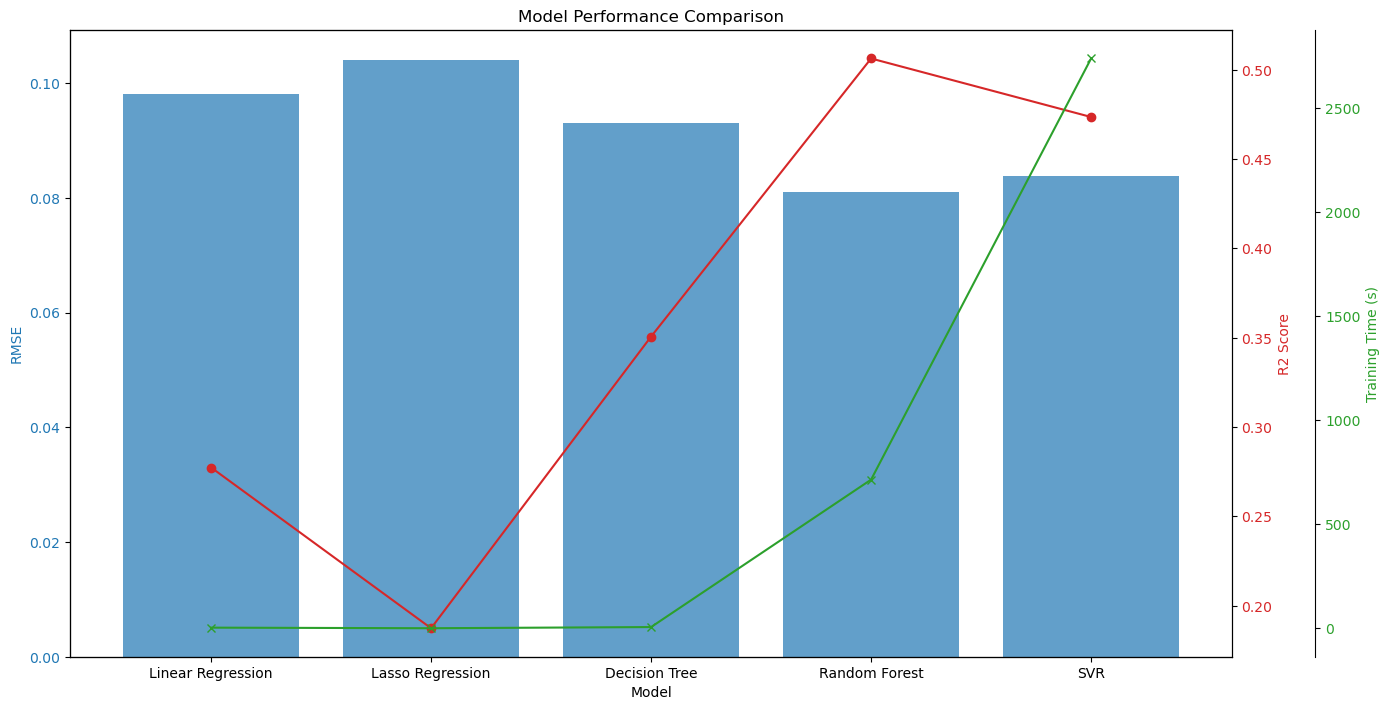

In [25]:
# Compare Performance of Individual Models
models = ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR']
rmse_scores = [lm3_rmse, lasso_rmse, dt_rmse, rf_rmse, svr_rmse]
r2_scores = [lm3_r2, lasso_r2, dt_r2, rf_r2, svr_r2]
times = [lm3_time, lasso_time, dt_time, rf_time, svr_time]

performance_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'R2 Score': r2_scores,
    'Training Time (s)': times
})

print(performance_df)

# Plot the comparison
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot RMSE
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color='tab:blue')
ax1.bar(models, rmse_scores, color='tab:blue', alpha=0.7, label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot R2 Score on the same graph
ax2 = ax1.twinx()
ax2.set_ylabel('R2 Score', color='tab:red')
ax2.plot(models, r2_scores, color='tab:red', marker='o', label='R2 Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Plot Training Time on the same graph
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Training Time (s)', color='tab:green')
ax3.plot(models, times, color='tab:green', marker='x', label='Training Time')
ax3.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Model Performance Comparison')
plt.show()


In [32]:
# Implement Stacking
from sklearn.ensemble import StackingRegressor

# Define the base models
base_models = [
    ('lasso', best_lasso),
    ('decision_tree', best_dt),
    ('random_forest', best_rf),
    ('svr', best_svr)
]

# Define the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking regressor
start_time = time.time()
stacking_regressor.fit(X_train_scaled, y_train)
stacking_time = time.time() - start_time

# Evaluate the stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_scaled)
stacking_rmse = mean_squared_error(y_test, y_pred_stacking, squared=False)
stacking_r2 = r2_score(y_test, y_pred_stacking)

# Add stacking results to the performance DataFrame
performance_df = performance_df.add({
    'Model': 'Stacking Regressor',
    'RMSE': stacking_rmse,
    'R2 Score': stacking_r2,
    'Training Time (s)': stacking_time
})

print(performance_df)


                                               Model      RMSE  R2 Score  \
0  Linear RegressionStacking RegressorStacking Re...  0.337815  1.840275   
1  Lasso RegressionStacking RegressorStacking Reg...  0.343745  1.750291   
2  Decision TreeStacking RegressorStacking Regres...  0.332705  1.913567   
3  Random ForestStacking RegressorStacking Regres...  0.320791  2.069257   
4  SVRStacking RegressorStacking RegressorStackin...  0.323439  2.036495   

  Training Time (s)  
0          42.53957  
1         39.686318  
2         45.291538  
3        754.078495  
4       2778.832371  


C:\Users\Dave\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
print(f"stacking_rmse: {stacking_rmse}")
print(f"stacking_square: {stacking_r2}")

stacking_rmse: 0.08008409750634736
stacking_square: 0.5187048745680198


C:\Users\Dave\AppData\Local\Temp\ipykernel_93636\3844665432.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(performance_data.index, rotation=45, ha='right', rotation_mode='anchor', wrap=True)


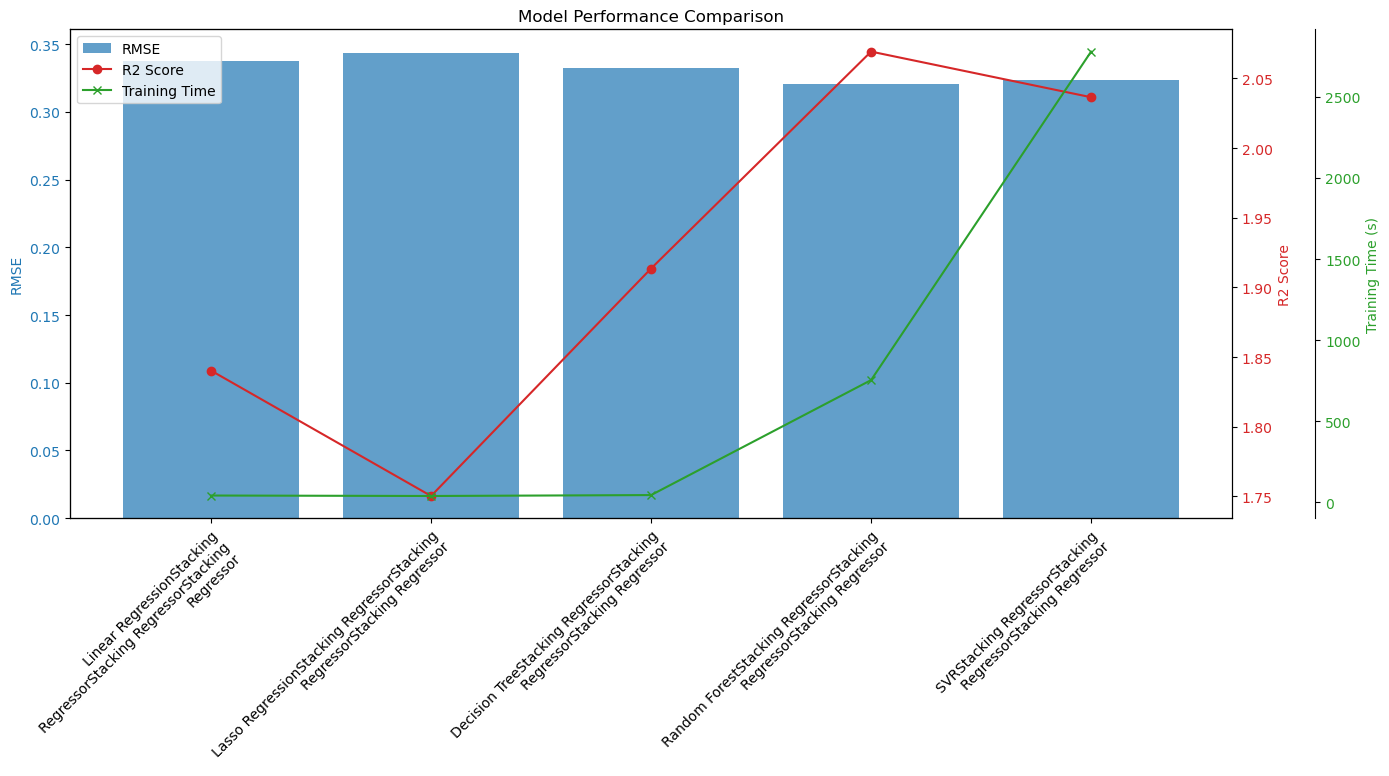

In [40]:
performance_data = performance_df.copy()
performance_data.set_index('Model', inplace=True)

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot RMSE
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color='tab:blue')
bars_rmse = ax1.bar(performance_data.index, performance_data['RMSE'], color='tab:blue', alpha=0.7, label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Set the x-axis labels with multi-line or slanted format
ax1.set_xticklabels(performance_data.index, rotation=45, ha='right', rotation_mode='anchor', wrap=True)

# Plot R2 Score on the same graph
ax2 = ax1.twinx()
ax2.set_ylabel('R2 Score', color='tab:red')
line_r2 = ax2.plot(performance_data.index, performance_data['R2 Score'], color='tab:red', marker='o', label='R2 Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Plot Training Time on the same graph
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Training Time (s)', color='tab:green')
line_time = ax3.plot(performance_data.index, performance_data['Training Time (s)'], color='tab:green', marker='x', label='Training Time')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Add legend
lines = [bars_rmse, line_r2[0], line_time[0]]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.title('Model Performance Comparison')
plt.show()